In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [18]:
img = plt.imread("road.jpg")

In [19]:
grayimg = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)

In [20]:
blurred = cv2.GaussianBlur(grayimg,(7,7),0)

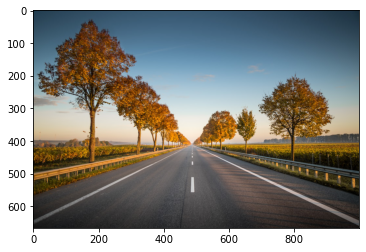

In [21]:
plt.imshow(img)

EDGE DETECTION USING CANNY

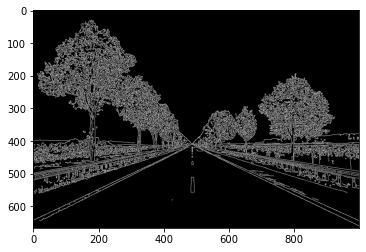

In [22]:
th1 = 100
th2 = 200
can = cv2.Canny(img,th1,th2)
plt.figure()
plt.imshow(can,cmap="gray")

----------------------------------------------------------------

REGION OF INTEREST

In [23]:
vert = np.array([[(0,657),(500,400),(500,410),(1040,667)]],dtype= np.int32)

In [24]:
vert

array([[[   0,  657],
        [ 500,  400],
        [ 500,  410],
        [1040,  667]]])

In [25]:
mask = np.zeros_like(grayimg)
mask.shape


(667, 1000)

In [26]:
grayimg.shape

(667, 1000)

In [27]:
xx = cv2.fillPoly(mask,vert,255)

In [28]:
xx.shape

(667, 1000)

In [29]:
maskedimg = cv2.bitwise_and(can,mask)

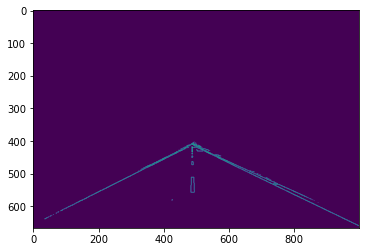

In [33]:
plt.imshow(maskedimg)

-------------------------------------------------------------------------

HOUGH LINES DETECTION

In [34]:
row =2
theta = np.pi/180 #radians
thres = 50
min_line_len = 100
max_line_gap = 40

lines = cv2.HoughLinesP(maskedimg,row,theta,thres,np.array([]),minLineLength=min_line_len, maxLineGap=max_line_gap)

line_image = np.zeros((maskedimg.shape[0],maskedimg.shape[1],3),dtype=np.uint8)

for line in lines:
    for x1,y1,x2,y2 in line:
        cv2.line(line_image,(x1,y1),(x2,y2),[255,0,0],20)

lines


array([[[ 36, 639, 243, 534]],

       [[779, 553, 998, 659]],

       [[482, 411, 828, 566]],

       [[298, 508, 492, 405]],

       [[482, 412, 605, 469]],

       [[350, 477, 496, 412]],

       [[214, 550, 388, 462]],

       [[485, 557, 488, 410]],

       [[ 36, 638, 207, 551]],

       [[364, 475, 478, 415]]], dtype=int32)

In [35]:
a =1
b=1
c=0
final = cv2.addWeighted(img,a,line_image,b,c)


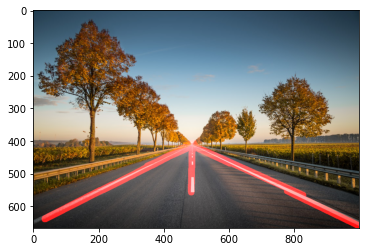

In [37]:
plt.figure()
plt.imshow(final)